In [1]:
!pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.8 MB/s eta 0:00:00


In [2]:
%matplotlib inline

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:
def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc

In [5]:
def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

In [6]:
def qft_circuit(n):
    """Builds an n-qubit Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc

Running Quantum Fourier Transform on 3 qubits...


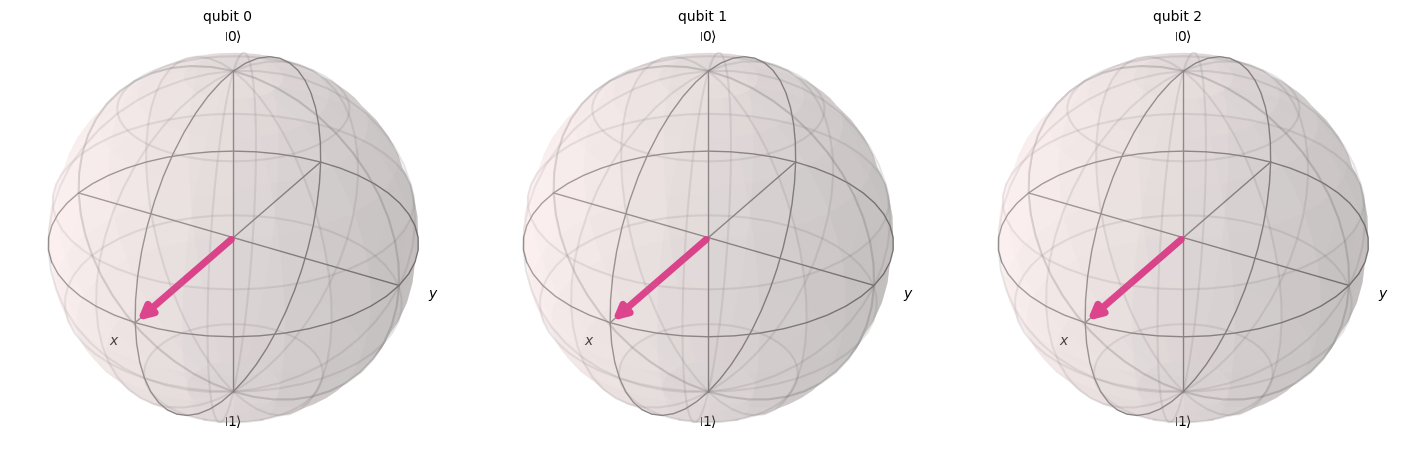

                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘                                              ░      


In [8]:
def run_qft(n):
    """Executes QFT circuit and displays Bloch sphere representation."""
    qc = qft_circuit(n)

    # Create a simulator and save the statevector explicitly
    simulator = AerSimulator(method='statevector')
    qc.save_statevector()

    # Transpile and run
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()

    # Retrieve statevector safely
    statevector = result.data(0)["statevector"]

    # Display results
    display(plot_bloch_multivector(statevector))
    print(qc.draw(output='text'))

if __name__ == "__main__":
    n_qubits = 3
    print(f"Running Quantum Fourier Transform on {n_qubits} qubits...")
    run_qft(n_qubits)


--- Quantum Fourier Transform for 2 qubits ---


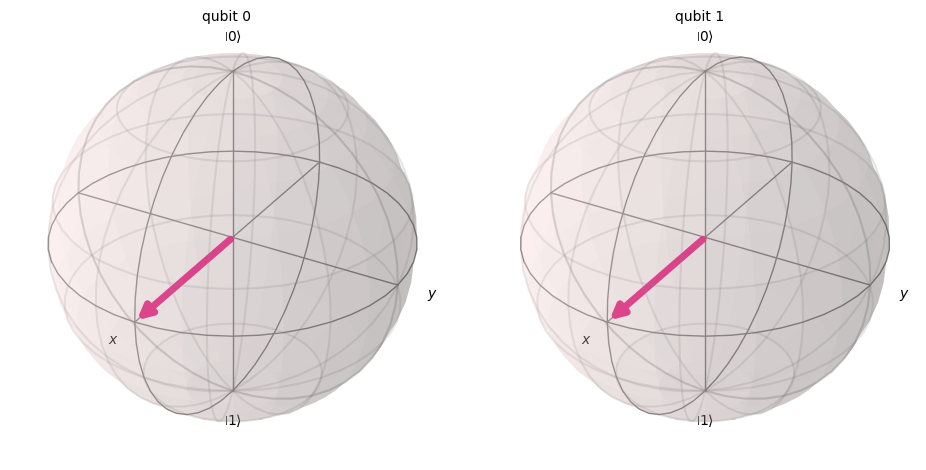

                   ┌───┐    statevector 
q_0: ──────■───────┤ H ├─X───────░──────
     ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ┤ H ├─■─────────────X───────░──────
     └───┘                       ░      

--- Quantum Fourier Transform for 3 qubits ---


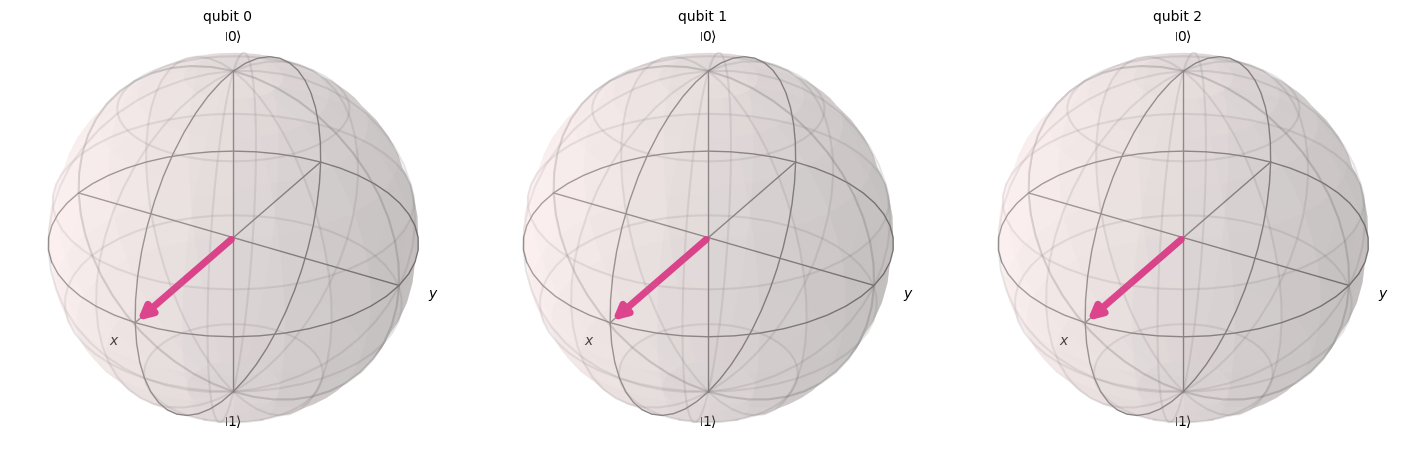

                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘                                              ░      

--- Quantum Fourier Transform for 4 qubits ---


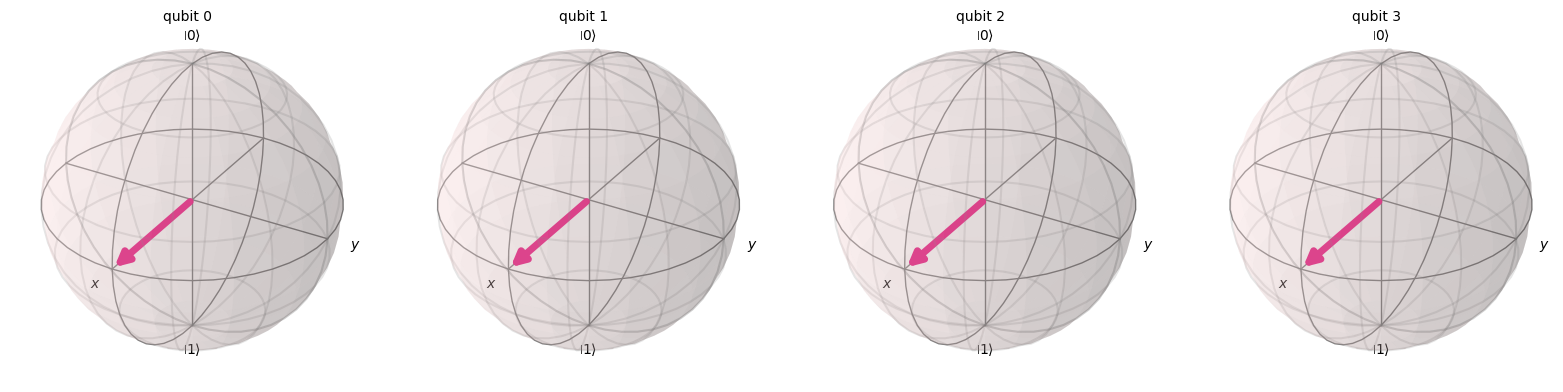

                                                                          ┌───┐»
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├»
           │                               │                ┌───┐ │P(π/2) └───┘»
q_1: ──────┼────────■──────────────────────┼────────■───────┤ H ├─■─────────X──»
           │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘           │  »
q_2: ──────┼────────┼────────■───────┤ H ├─■────────■───────────────────────X──»
     ┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                     »
q_3: ┤ H ├─■────────■────────■─────────────────────────────────────────────────»
     └───┘                                                                     »
«         statevector 
«q_0: ─X───────░──────
«      │       ░      
«q_1: ─┼───────░──────
«      │       ░      
«q_2: ─┼───────░──────
«      │       ░      
«q_3: ─X───────░──────
«              ░      


In [10]:
for n_qubits in [2, 3, 4]:
    print(f"\n--- Quantum Fourier Transform for {n_qubits} qubits ---")
    run_qft(n_qubits)

In [11]:
#TASK 2

def inverse_qft_circuit(n):
    qc = QuantumCircuit(n)
    swap_registers(qc, n)

    # Apply inverse rotations (reverse order and negative angles)
    for j in range(n - 1, -1, -1):
        for k in range(j - 1, -1, -1):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)

    qc.name = "Inverse QFT"
    return qc

iqft = inverse_qft_circuit(3)
print(iqft.draw(output='text'))

                                      ┌───┐
q_0: ─X────────────■─────────■────────┤ H ├
      │            │         │P(-π/2) ├───┤
q_1: ─┼──■─────────┼─────────■────────┤ H ├
      │  │P(-π/2)  │P(-π/4)   ┌───┐   └───┘
q_2: ─X──■─────────■──────────┤ H ├────────
                              └───┘        


In [12]:
#TASK 3

from qiskit import QuantumCircuit
import numpy as np

def phase_estimation(unitary, num_ancillas):
    n_target = unitary.num_qubits
    qc = QuantumCircuit(num_ancillas + n_target)

    for q in range(num_ancillas):
        qc.h(q)

    for q in range(num_ancillas):
        power = 2 ** q
        qc.append(unitary.power(power).to_gate().control(1), [q] + list(range(num_ancillas, num_ancillas + n_target)))

    iqft = inverse_qft_circuit(num_ancillas)
    qc.append(iqft.to_gate(), range(num_ancillas))

    qc.measure_all()
    return qc

phi = 1/4
U = QuantumCircuit(1)
U.p(2 * np.pi * phi, 0)

qpe = phase_estimation(U, num_ancillas=3)
print(qpe.draw(output='text'))

        ┌───┐                                                   »
   q_0: ┤ H ├────────■──────────────────────────────────────────»
        ├───┤        │                                          »
   q_1: ┤ H ├────────┼────────────────■─────────────────────────»
        ├───┤        │                │                         »
   q_2: ┤ H ├────────┼────────────────┼────────────────■────────»
        └───┘┌───────┴───────┐┌───────┴───────┐┌───────┴───────┐»
   q_3: ─────┤ circuit-63**1 ├┤ circuit-63**2 ├┤ circuit-63**4 ├»
             └───────────────┘└───────────────┘└───────────────┘»
meas: 4/════════════════════════════════════════════════════════»
                                                                »
«        ┌──────────────┐ ░ ┌─┐         
«   q_0: ┤0             ├─░─┤M├─────────
«        │              │ ░ └╥┘┌─┐      
«   q_1: ┤1 Inverse QFT ├─░──╫─┤M├──────
«        │              │ ░  ║ └╥┘┌─┐   
«   q_2: ┤2             ├─░──╫──╫─┤M├───
«        └──────────────┘ ░ 

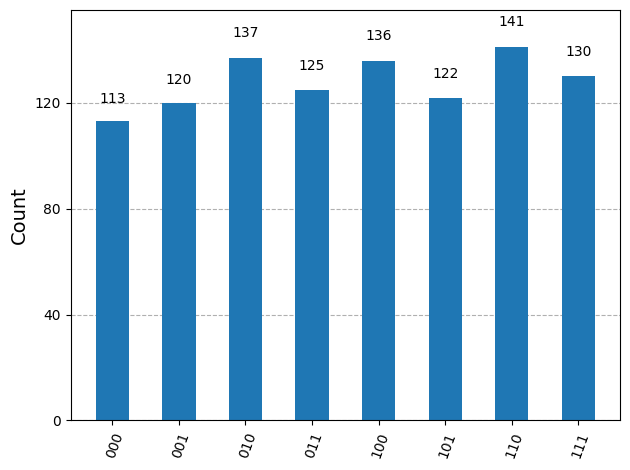

                                             ┌───┐    ░ ┌─┐      
   q_0: ──────■──────────────────────■───────┤ H ├─X──░─┤M├──────
              │                ┌───┐ │P(π/2) └───┘ │  ░ └╥┘┌─┐   
   q_1: ──────┼────────■───────┤ H ├─■─────────────┼──░──╫─┤M├───
        ┌───┐ │P(π/4)  │P(π/2) └───┘               │  ░  ║ └╥┘┌─┐
   q_2: ┤ H ├─■────────■───────────────────────────X──░──╫──╫─┤M├
        └───┘                                         ░  ║  ║ └╥┘
meas: 3/═════════════════════════════════════════════════╩══╩══╩═
                                                         0  1  2 
Measurement counts: {'100': 136, '101': 122, '110': 141, '001': 120, '000': 113, '010': 137, '011': 125, '111': 130}


In [15]:
#TASK 4

from qiskit.visualization import plot_histogram

def run_qft_with_measurement(n):
    qc = qft_circuit(n)
    qc.measure_all()
    simulator = AerSimulator()
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled, shots=1024).result()

    counts = result.get_counts()
    display(plot_histogram(counts))
    print(qc.draw(output='text'))
    print("Measurement counts:", counts)

run_qft_with_measurement(3)

In [25]:
def visualize_qft_circuit(n):
    qc = qft_circuit(n)
    display(qc.draw('text'))

visualize_qft_circuit(3)


┌───┐   
q_0: ──────■──────────────────────■───────┤ H ├─X─
           │                ┌───┐ │P(π/2) └───┘ │ 
q_1: ──────┼────────■───────┤ H ├─■─────────────┼─
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │ 
q_2: ┤ H ├─■────────■───────────────────────────X─
     └───┘